# Deep Learning week - Day 3 - Mnist classification

### Exercise objectives
- Implement a CNN architecture with convolution layers
- Run a Neural Network on images

<hr>
<hr>

Let's imagine for a moment that you are working for the postal office (and you're in 1970 / 1980). You deal everyday with a enourmous amont of letters, and you want to automate the process of reading the numbers that have been handwritten. This task, called the _Handwriting Recognition_, has been a very complex that has been handled by Bell Labs (among other) where Yann Le Cun used to work, and where such things have been developed : 

![Number recognition](recognition.gif)


The idea is that you have an image (not a video: the animation is here to present what happens with different images) as an input and you try to predict the figure on the image - it corresponds to a classification task, where the output is the class (=figure) the image belongs to, from 0 to 9.

This task used to be quite complex back in the time, and still is a benchmark on which a lot of people work. For this reason, the MNIST (for *Modified ou Mixed National Institute of Standards and Technology*) dataset has been created: it corresponds to digit images, from 0 to 9. 

You goal in this notebook is to build a Convolution Neural Network that can work on such images and predict the corresponding class of each digit image. Keep in mind that this CNN will make you classify hand-written digits, which was a very complex task till the 90's. 

## The data

Keras provides multiple datasets within the Python package. You can load it with the following commands:

In [1]:
from tensorflow.keras import datasets

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data(path="mnist.npz")

2021-08-25 14:22:19.171006: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-25 14:22:19.171051: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


❓ Question ❓ Let's look at some of the data. 

Select some of the values of the train set and plot them thanks to the `imshow` function from matplotlib with `cmap` set to `gray`(otherwise, the displayed colors are just some arrangement Matplotlib does, which does not exist in practice).

In [2]:
X_train.shape

(60000, 28, 28)

(60000, 28, 28)


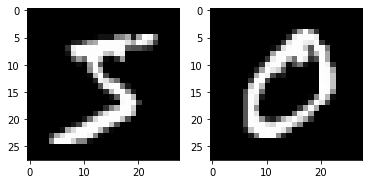

In [3]:
# YOUR CODE HERE
import matplotlib.pyplot as plt

print(X_train.shape)
plt.subplot(1,2,1)
plt.imshow(X_train[0], cmap="gray");
plt.subplot(1,2,2)
plt.imshow(X_train[1], cmap="gray");


Remember that neural networks converge faster when the input data are somehow normalized? It goes similarly for input images. 

❓ Question ❓ As a first preprocessing step, you should normalize your data. For images, it simply implies to divide your input data by the maximal value, i.e. 255. Don't forget to do it on your train and test data.

(N.B.: you can also centered your data, by substracting 0.5 but it is not mandatory). 

In [4]:
# YOUR CODE HERE

X_train = X_train / 255
X_test = X_test / 255

❓ Question ❓ What is the shape of your images?

In [5]:
# YOUR CODE HERE

X_train[0].shape

(28, 28)

You see that you have 60.000 training images, all of size (28, 28). However, Keras needs images whose last dimension is the number of channels, which is missing here.

❓ Question ❓ Use the `expand_dims` to add one dimension at the end of the training and test data. Then, print the shape of X_train and X_test that should respectively be (60000, 28, 28, 1) and (10000, 28, 28, 1).

In [6]:
from tensorflow.keras.backend import expand_dims

X_train = expand_dims(X_train, -1)

X_test  = expand_dims(X_test , -1)

2021-08-25 14:22:27.502530: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-08-25 14:22:27.502570: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-08-25 14:22:27.502588: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Nandosoq): /proc/driver/nvidia/version does not exist
2021-08-25 14:22:27.502797: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
print(X_train.shape.as_list(),X_test .shape.as_list())

[60000, 28, 28, 1] [10000, 28, 28, 1]


A last thing to do to prepare your data is to convert your labels to one-hot encoded categories.

❓ Question ❓ Use `to_categorical` to transform your labels. Store the results in `y_train_cat` and `y_test_cat`.

In [8]:
import numpy as np
len(np.unique(y_train))

10

In [9]:
from tensorflow.keras.utils import to_categorical

# One Hot Encode our Target for TensorFlow processing
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)
y_cat_train.shape

(60000, 10)

The data are now ready to be used.

## The Convolutional Neural Network _aka_ CNN

Now, build a Convolutional Neural Network. 

❓ Question ❓ Based on the course, build a neural network that has:
- a `Conv2D` layer with 8 filters, each of size (4, 4), with an input shape suitable for your task, the relu activation function, and padding='same' so as to 
- a `MaxPool2D` layer with a pool_size of (2, 2)
- a second `Conv2D` layer with 16 filters, each of size (3, 3), and the relu activation function
- a second `MaxPool2D` layer with a pool_size of (2, 2)
- a `Flatten` layer
- a first `Dense` layer with 10 neurons and the relu activation function
- a last layer that is suited for your task

In the function, do not forget to include the compilation of the model, which optimizes the `categorical_crossentropy` with the adam optimizer - and the accuracy should be among the metrics.

In [ ]:
model = Sequential()

#a Conv2D layer with 8 filters, each of size (4, 4), with an input shape suitable for your task, 
#the relu activation function, and padding='same' so as to
model.add(layers.Conv2D(8, (4,4), input_shape=(28, 28, 1), padding='same', activation="relu"))

#a MaxPool2D layer with a pool_size of (2, 2)
model.add(layers.MaxPool2D(pool_size=(2,2)))

#a second Conv2D layer with 16 filters, each of size (3, 3), and the relu activation function
model.add(layers.Conv2D(16, (3,3), padding='same', activation="relu"))

#a second MaxPool2D layer with a pool_size of (2, 2)
model.add(layers.MaxPool2D(pool_size=(2,2)))

#a Flatten layer
model.add(layers.Flatten())
#a first Dense layer with 10 neurons and the relu activation function
model.add(layers.Dense(10, activation='relu')) # intermediate layer

#a last layer that is suited for your task
model.add(layers.Dense(10, activation='softmax'))

In [11]:
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers

def initialize_model():
    model = Sequential()
    ### First convolution & max-pooling
    model.add(layers.Conv2D(8, (4,4), input_shape=(28, 28, 1), padding='same', activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    ### Second convolution & max-pooling
    model.add(layers.Conv2D(16, (3,3), padding='same', activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    ### Flattening
    model.add(layers.Flatten())

    ### One fully connected
    model.add(layers.Dense(10, activation='relu')) # intermediate layer

    ### Last layer (let's say a classification with 10 output)
    model.add(layers.Dense(10, activation='softmax'))
    
    ### Model compilation
    return model

❓ Question ❓ How many trainable parameters are there in your model?
- Compute them with `model.summary()` first
- Recompute them manually layer per layer then

In [15]:
model = initialize_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 8)         136       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

❓ Question ❓ Initialize your model and fit it on the train data. 
- Do not forget to use a validation set and an early stopping criterion. 
- Limit at 5 epoch max in this challenge (just to save time)

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

# Classification with more classes
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

es = EarlyStopping(patience=5, restore_best_weights=True)

model.fit(X_train, y_cat_train,
          batch_size=16, 
          epochs=1,
          validation_split=0.3,
          callbacks=[es],
          verbose=0)
            #,          njobs=-1)


You probably see that the model converges within few epochs. The reason is that there are as many weight update as there are batches within each epoch. For instance, if you batch_size is of 32, you have 60.000/32 = 1875 updates.


❓ Question ❓ What is your accuracy on the test set?

In [24]:
# YOUR CODE HERE
model.evaluate(X_test, y_cat_test, verbose=0)[1]

0.9732000231742859

### You should be already impressed by your skills! You solved what was a very hard problem 30 years ago with your CNN.

🏁 Congratulation! Don't forget to commit and push your notebook